<a href="https://colab.research.google.com/github/Himanshuengg/KnowledgeGraph-NLP/blob/main/KnowledgeGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Knowledge Graph**

In [ ]:
import numpy as np
import pandas as pd


data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/srtek/Assignment/Phrases search/Data/Input/Juniper_Clause_Data_20K.xlsx")
data.head()

,S.No.,Clause Text
0,1,FSS plans to merge the Single Instance and Mul...
1,2,Vendors and their Personnel are free to make c...
2,3,"o~;e/.iSrn\.i;;n€iJo ritr>~eniDr ,­ 1_;~ oroa...."
3,4,"Fees, Invoicing and Payment The professional f..."
4,5,We will forward to the Company the corporation...


In [ ]:
# drop column of S.No.


data.drop('S.No.',axis='columns', inplace=True)
data.head()

,Clause Text
0,FSS plans to merge the Single Instance and Mul...
1,Vendors and their Personnel are free to make c...
2,"o~;e/.iSrn\.i;;n€iJo ritr>~eniDr ,­ 1_;~ oroa...."
3,"Fees, Invoicing and Payment The professional f..."
4,We will forward to the Company the corporation...


In [ ]:
sample_data = data['Clause Text'].sample(50)  # taking 50 random samples

NameError: ignored

In [ ]:
type(sample_data)

pandas.core.series.Series

In [ ]:
sample_data.columns = ['index','text']

sample_data

9537     Networks, inc, 1494 N. Mathie Ave., Suanyvele,...
9419     You shall (at Your expense): Page 9 of 19 JFS ...
3202     9.2 Exclusions. Confidential Information will ...
8364     Whereas, the parties entered into a Value Adde...
15472    N. Mathilda Avenue, Sunnyvale, CA 94089 oate: ...
15449    ame: f<y1d'1 "'- e:l'h-iau vt Title: -Blf?, Cf...
13579    DocuSign Envelope ID: 656E19F8-9B69-4F53-A3AD-...
1015     Annex OTS 7.2 Juniper Carrier Instruction Retu...
9449     Verizon IP Service Access Customer, or Verizon...
14438    Director Legal 29-Oct-2015 | 05:12 PT DocuSign...
5757     This data processing agreement (the “Data Proc...
13461    6.1 ayment. If Reseller is located in the Unit...
14454    U.S. GOVERNMENT END USERS The Software is a co...
15286    Furthermore, we acknowledge and understand tha...
2547     As instructed and requested by Program Manger,...
10163    (2) Unclassified material shall be shipped in ...
15937    DocuSign Envelope ID: F6D247C4-0712-4504-92DA-.

**Importing Libraries**

In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

**Finding POS- Parts of Speech**

In [ ]:
for data in sample_data:
  doc = nlp(str(data))

  for tok in doc:
    print(tok.text, "...", tok.dep_)

Networks ... nmod
, ... punct
inc ... ROOT
, ... punct
1494 ... npadvmod
N. ... compound
Mathie ... compound
Ave ... ROOT
. ... punct
, ... punct
Suanyvele ... dep
, ... punct
CA ... appos
94089 ... nummod
, ... punct
ATTN ... ROOT
: ... punct
Ganaral ... compound
Counsel ... ROOT
You ... nsubj
ity ... compound
chtaln ... ROOT
a ... det
oupy ... dobj
of ... prep
tho ... compound
GPL ... pobj
at ... prep
hit ... pobj
diwnnw.onu ... dobj
ora ... intj
/ ... punct
liceneseianl ... ROOT
him ... dobj
, ... punct
aad ... conj
a ... det
copy ... dobj
of ... prep
the ... det
LGPL ... pobj
at ... prep
NLD ... pobj
. ... punct
fury ... compound
gore ... nsubj
ican ... ROOT
asalicypl ... compound
hte ... compound
ul ... dobj
. ... punct
You ... nsubj
shall ... ROOT
( ... punct
at ... intj
Your ... poss
expense ... pobj
) ... punct
: ... punct
Page ... parataxis
9 ... nummod
of ... prep
19 ... nummod
JFS ... compound
Master ... compound
Rental ... compound
Agreement ... pobj
– ... punct
March ... n

**Extract entity pairs for all the sample_data**

In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
entity_pairs = []

for data in sample_data:
  #doc = str(data)

  List = get_entities(str(data))
  entity_pairs.append(List)


In [ ]:
entity_pairs

[['fury gore', 'asalicypl hte ul'],
 ['2018 Juniper Business', 'free  https://foxyutils.com'],
 ['disclosing securities securities', 'competent securities which'],
 ['parties', 'collectively Added Reseller Agreement'],
 ['12 INSURANCE Vendor', 'following'],
 ['UBS Securities llC', 'UBS AG'],
 ['Equipment Utilities Maintenance CBRE', 'maintenance same'],
 ['7.2 Return instructions', 'GFA Juniper RMA TSAO5S'],
 ['', 'breach User Terms'],
 ['', ''],
 ['applicable Data Processing Agreement', 'applicable master which'],
 ['Juniper Networks', 'unperformed termination Services'],
 ['1995 Government End Users', 'only  Agreement'],
 ['Pvt Aon Insurance Limited', 'directly Pakistan Branch Office'],
 ['such  JNAAM', 'such  materials'],
 ['Unclassified  material', 'safe  destination'],
 ['days  advance', 'written  effect'],
 ['core staging SONET', 'various Internet sites'],
 ['', '24,800 16 expenses'],
 ['invalid  part', 'possible  manner'],
 ['U.S. Treasury list', 'otherwise Denial Orders'],
 ['F

In [ ]:
len(entity_pairs)

50

**Extract relation for all the sample_data**

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
relations = []

for data in sample_data:
  #doc = str(data)

  List = get_relation(str(data))
  relations.append(List)

In [ ]:
relations

['ican',
 '9179-F12BAE07DE55',
 'required',
 'entered into',
 'maintain',
 'is',
 'understands',
 'provided in',
 'Customer',
 'C06A610260D4',
 'i',
 'considered in',
 'acquire',
 'acknowledge',
 'provide',
 'shipped in',
 'provide',
 'Validation of',
 'TOTAL',
 'construed in',
 'shipped',
 'renewed at',
 'Records',
 'exercise',
 'provide nightly',
 'fot without',
 'replaced under',
 'ycnoBna',
 'SRX345JSE',
 'be liable',
 'B',
 'take appropriate',
 '68,995.00',
 'Ul',
 '.',
 'Type of',
 'means',
 'are Net',
 'is',
 'CIN',
 'agree',
 'be',
 'advised',
 'engage in',
 'APPLY NOTWITHSTANDING',
 'Consult with',
 'send',
 'terminate',
 'Based on',
 'Agreement']

In [ ]:
len(relations)

50

**Creating a dataframe of entities and relation**

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
kg_df

,source,target,edge
0,fury gore,asalicypl hte ul,ican
1,2018 Juniper Business,free https://foxyutils.com,9179-F12BAE07DE55
2,disclosing securities securities,competent securities which,required
3,parties,collectively Added Reseller Agreement,entered into
4,12 INSURANCE Vendor,following,maintain
5,UBS Securities llC,UBS AG,is
6,Equipment Utilities Maintenance CBRE,maintenance same,understands
7,7.2 Return instructions,GFA Juniper RMA TSAO5S,provided in
8,,breach User Terms,Customer
9,,,C06A610260D4


**Create a directed-graph from a dataframe**

In [ ]:

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

**Plot the network**

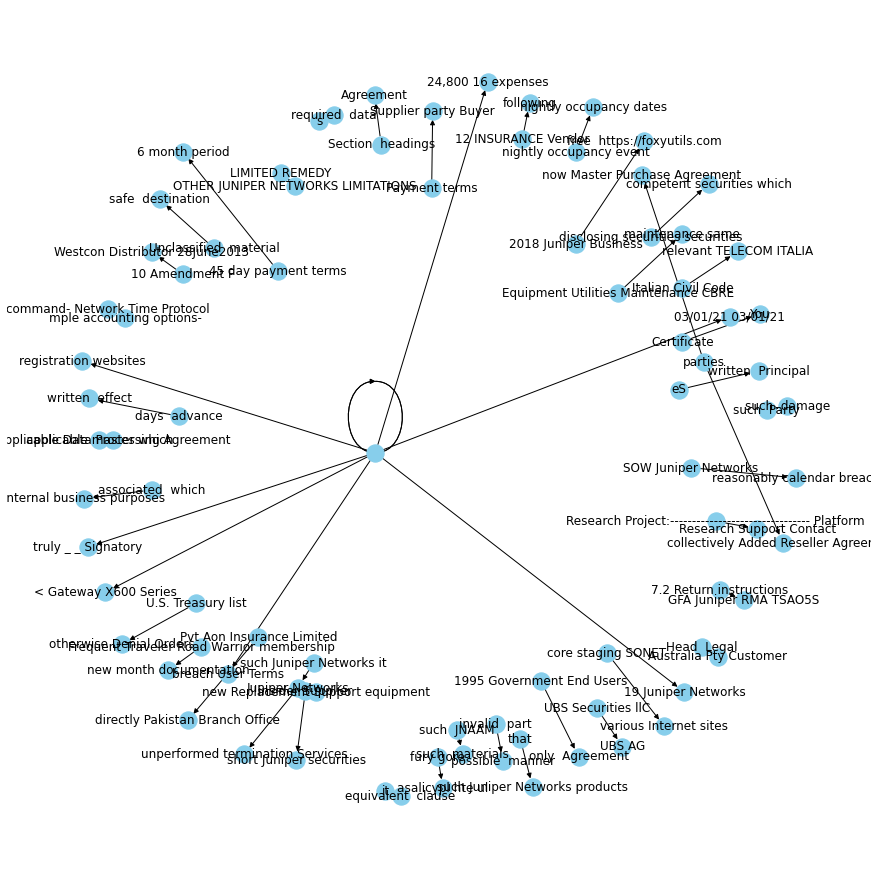

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

**---------------------------------------------------------------------------**

# **Apply sent_tokenization on sample_data**

In [ ]:

import nltk
nltk.download('punkt')

our_data = []
for data in sample_data:
  a_list = nltk.tokenize.sent_tokenize(data)
  #print(a_list)
  for line in a_list:
    #print(line)
    our_data.append(line)
  #print(data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
our_data

['Networks, inc, 1494 N. Mathie Ave., Suanyvele, CA 94089, ATTN: Ganaral Counsel You ity chtaln a oupy of tho GPL at hit diwnnw.onu ora/liceneseianl him, aad a copy of the LGPL at NLD.',
 'fury gore ican asalicypl hte ul.',
 'You shall (at Your expense): Page 9 of 19 JFS Master Rental Agreement – March 2018 Juniper Business Use Only Created for free by https://foxyutils.com DocuSign Envelope ID: 6A8D263F-AAB6-4180-9179-F12BAE07DE55',
 '9.2 Exclusions.',
 "Confidential Information will not include any information that (a)is or becomes generally known to the public through no fault or breach of this Agreement by the receiving party; (b) the receiving party can demonstrate by written evidence was rightfully in the receiving party s possession the time of disclosure, without = an obligation of confidentiality; (c) is independently developed by the receiving party without use of or access to the disclosing party's Confidential Information; (d) the receiving party rightfully obtains from a t

In [ ]:
our_data_df = pd.DataFrame({'sentence': our_data})

our_data_df

,sentence
0,"Networks, inc, 1494 N. Mathie Ave., Suanyvele, CA 94089, ATTN: Ganaral Counsel You ity chtaln a oupy of tho GPL at hit diwnnw.onu ora/liceneseianl him, aad a copy of the LGPL at NLD."
1,fury gore ican asalicypl hte ul.
2,You shall (at Your expense): Page 9 of 19 JFS Master Rental Agreement – March 2018 Juniper Business Use Only Created for free by https://foxyutils.com DocuSign Envelope ID: 6A8D263F-AAB6-4180-9179...
3,9.2 Exclusions.
4,Confidential Information will not include any information that (a)is or becomes generally known to the public through no fault or breach of this Agreement by the receiving party; (b) the receiving...
...,...
101,"Notice Address Juniper: Customer: For notices to Juniper Networks (US) Inc., Customer Name: IronNet Cybersecurity, Inc. shall send notices to Juniper Networks, Inc., 1133 Innovation Way, Sunnyvale..."
102,.
103,Calypso may terminate this Agreement and/or any SOW if Juniper Networks materially breaches the same and fails to cure such breach within thirty (30) calendar days after receipt of written notice ...
104,Research Tier Research Project:-------------------------------- Platform used:-------------------------------- Name of University Research Faculty : ________________________ _ Name of Juniper Rese...


In [ ]:

my_pos_list = []

for data in our_data_df.index:
  #print(sample_data['Clause Text'][data])
  doc = nlp(our_data_df['sentence'][data])

  for tok in doc:
    if tok.dep_.find("subj") == True or tok.dep_.find("obj") == True:
      my_pos_list.append(our_data_df['sentence'][data])
      break


      

In [ ]:
my_pos_list

['Networks, inc, 1494 N. Mathie Ave., Suanyvele, CA 94089, ATTN: Ganaral Counsel You ity chtaln a oupy of tho GPL at hit diwnnw.onu ora/liceneseianl him, aad a copy of the LGPL at NLD.',
 'fury gore ican asalicypl hte ul.',
 'You shall (at Your expense): Page 9 of 19 JFS Master Rental Agreement – March 2018 Juniper Business Use Only Created for free by https://foxyutils.com DocuSign Envelope ID: 6A8D263F-AAB6-4180-9179-F12BAE07DE55',
 "Confidential Information will not include any information that (a)is or becomes generally known to the public through no fault or breach of this Agreement by the receiving party; (b) the receiving party can demonstrate by written evidence was rightfully in the receiving party s possession the time of disclosure, without = an obligation of confidentiality; (c) is independently developed by the receiving party without use of or access to the disclosing party's Confidential Information; (d) the receiving party rightfully obtains from a third party not under

In [ ]:
len(my_pos_list)

91

**Final imput dataframe after qualify only those sentences that have one subject and one object**

In [ ]:
df_final = pd.DataFrame(my_pos_list,columns = ['final_data'])

df_final

,final_data
0,"Networks, inc, 1494 N. Mathie Ave., Suanyvele, CA 94089, ATTN: Ganaral Counsel You ity chtaln a oupy of tho GPL at hit diwnnw.onu ora/liceneseianl him, aad a copy of the LGPL at NLD."
1,fury gore ican asalicypl hte ul.
2,You shall (at Your expense): Page 9 of 19 JFS Master Rental Agreement – March 2018 Juniper Business Use Only Created for free by https://foxyutils.com DocuSign Envelope ID: 6A8D263F-AAB6-4180-9179...
3,Confidential Information will not include any information that (a)is or becomes generally known to the public through no fault or breach of this Agreement by the receiving party; (b) the receiving...
4,"Whereas, the parties entered into a Value Added Reseller Agreement with an effective date of December 9, 2004 (referred to herein collectively with it armendments and extensions as the Agreement }..."
...,...
86,"Consult with client on requirements and timeline for attendee and sponsor registration websites, event agenda creation, attendee tracks, and content management."
87,"Notice Address Juniper: Customer: For notices to Juniper Networks (US) Inc., Customer Name: IronNet Cybersecurity, Inc. shall send notices to Juniper Networks, Inc., 1133 Innovation Way, Sunnyvale..."
88,Calypso may terminate this Agreement and/or any SOW if Juniper Networks materially breaches the same and fails to cure such breach within thirty (30) calendar days after receipt of written notice ...
89,Research Tier Research Project:-------------------------------- Platform used:-------------------------------- Name of University Research Faculty : ________________________ _ Name of Juniper Rese...


In [ ]:
final_sample_data = df_final['final_data']

**Extract entity pairs for all the sample_data**

In [ ]:
final_entity_pairs = []

for data in final_sample_data:
  # doc = str(data)
  # print(doc)
  List = get_entities(str(data))
  final_entity_pairs.append(List)


In [ ]:
final_entity_pairs

[['94089 Ganaral You', 'tho NLD'],
 ['fury gore', 'asalicypl hte ul'],
 ['2018 Juniper Business', 'free  https://foxyutils.com'],
 ['disclosing securities securities', 'competent securities which'],
 ['parties', 'collectively Added Reseller Agreement'],
 ['12 INSURANCE Vendor', 'following'],
 ['CfO!c c.o UBS Investment Bank', 'UBS AG'],
 ['UBS Securities llC', 'UBS AG'],
 ['Equipment Utilities Maintenance CBRE', 'maintenance same'],
 ['7.2 Return instructions', 'GFA Juniper RMA TSAO5S'],
 ['', 'breach User Terms'],
 ['data processing agreement', 'Oracle Oracle Cloud Services'],
 ['applicable Data Processing Agreement', 'applicable master which'],
 ['United Reseller', '30 Juniper invoice'],
 ['United Reseller', 'payable Juniper sight'],
 ['purchases', 'prior Networks finance department'],
 ['Reseller', 'whenever Juniper Networks'],
 ['Juniper Networks', 'such payment record action'],
 ['1.5  whichever', 'overdue  balance'],
 ['days Juniper Networks', 'written End Reseller'],
 ['Juniper 

**Extract relation for all the sample_data**

In [ ]:
final_relations = []

for data in final_sample_data:
  #doc = str(data)

  List = get_relation(str(data))
  final_relations.append(List)

In [ ]:
final_relations

['liceneseianl',
 'ican',
 '9179-F12BAE07DE55',
 'required',
 'entered into',
 'maintain',
 'is',
 'is',
 'understands',
 'provided in',
 'Customer',
 'applies to',
 'i',
 'pay',
 'pay',
 'are subject',
 'submit financial',
 'reserves',
 'be subject',
 'terminate',
 'considered in',
 'is',
 'Consistent with',
 'acquire',
 'acknowledge',
 'return',
 'related to',
 'provide',
 'shipped in',
 'estimated for',
 'agree',
 'disclaims',
 'provide',
 'Validation of',
 'TOTAL',
 'remain valid',
 'construed in',
 'acknowledge',
 'COMPLIANCE WITH',
 'shipped',
 'renewed at',
 'Records',
 'agree',
 'exercise',
 'refunded to',
 'are',
 'provide nightly',
 'Principal in',
 'fot without',
 'returns',
 'begins upon',
 'replaced under',
 'SRX345JSE',
 'release',
 'survive',
 'be liable',
 'determine',
 'be responsible',
 'provide',
 'B',
 'entitled',
 'take appropriate',
 '68,995.00',
 'Client',
 'Ul',
 '.',
 'Type of',
 'means',
 'are Net',
 'ensure',
 'is',
 'No',
 'identified',
 'agree',
 'be',
 'ar

**Creating a dataframe of entities and relation**

In [ ]:
# extract subject
source = [i[0] for i in final_entity_pairs]

# extract object
target = [i[1] for i in final_entity_pairs]

kg_df_2 = pd.DataFrame({'source':source, 'target':target, 'edge':final_relations})

In [ ]:
kg_df_2

,source,target,edge
0,94089 Ganaral You,tho NLD,liceneseianl
1,fury gore,asalicypl hte ul,ican
2,2018 Juniper Business,free https://foxyutils.com,9179-F12BAE07DE55
3,disclosing securities securities,competent securities which,required
4,parties,collectively Added Reseller Agreement,entered into
...,...,...,...
86,,registration websites,Consult with
87,Australia Pty Customer,Head Legal,send
88,SOW Juniper Networks,reasonably calendar breach,terminate
89,Research Project:-------------------------------- Platform,Research Support Contact,Based on


In [ ]:

# create a directed-graph from a dataframe
G_2=nx.from_pandas_edgelist(kg_df_2, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G_2, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()